In [1]:
from __future__ import print_function

"""
A script to run cqed_rhf method on the formaldehyde coupled to a photon with 
different polarizations and coupling magnitude |\lambda| = 0.2 atomic units
to produce data from Table I of McTague and Foley 
"""

__authors__   = ["Jon McTague", "Jonathan Foley"]
__credits__   = ["Jon McTague", "Jonathan Foley"]

__copyright_amp__ = "(c) 2014-2018, The Psi4NumPy Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-01-15"

# ==> Import Psi4, NumPy, & SciPy <==
import psi4
import numpy as np
from helper_cqed_rhf import *
from helper_ciss_prism import *
from matplotlib import pyplot as plt

# Set Psi4 & NumPy Memory Options
psi4.set_memory('2 GB')
psi4.core.set_output_file('output.dat', False)

numpy_memory = 2


  Memory set to   1.863 GiB by Python driver.


In [46]:
# template for z-matrix
molstr = """
Mg
H 1 2.2
symmetry c1
1 1
"""

# options dict
options_dict = {'basis': 'cc-pVDZ',
               'save_jk': True, 
               'scf_type': 'pk'}

# set psi4 options
psi4.set_options(options_dict)

om = 4.75 / 27.211
lam = np.array([0, 0, 0.00])

# cqed-rhf
#cqed_rhf_dict = cqed_rhf(lam, molstr, options_dict)

# cqed-cis
cqed_cis_dict = cs_cqed_cis(lam, om, molstr, options_dict)



Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6658775836986592
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -199.8639591041884387   dE = -1.99864E+02   dRMS = 4.60245E-08
SCF Iteration   2: Energy = -199.8639591041913377   dE = -2.89901E-12   dRMS = 1.41194E-08
Total time for SCF iterations: 0.002 seconds 

QED-RHF   energy: -199.86395910 hartree
Psi4  SCF energy: -199.86395910 hartree
102


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


In [47]:
scf_e = cqed_cis_dict["RHF ENERGY"]
cqed_scf_e = cqed_cis_dict["CQED-RHF ENERGY"]

ciss_pf_e = cqed_cis_dict["CISS-PF ENERGY"]
ciss_jc_e = cqed_cis_dict["CISS-JC ENERGY"]
cis_pf_e = cqed_cis_dict["CIS-PF ENERGY"]
cis_jc_e = cqed_cis_dict["CIS-JC ENERGY"]
cis_dse_e = cqed_cis_dict["CIS-DSE ENERGY"]


print(ciss_pf_e[1:8])
print(ciss_jc_e[1:8])
print(cis_pf_e[0:7])
print(cis_jc_e[0:7])
print(cis_dse_e[0:7])


[0.17384896 0.17456176 0.23332373 0.23332373 0.32799591 0.34841072
 0.38253047]
[0.17384896 0.17456176 0.23332373 0.23332373 0.32799591 0.34841072
 0.38253047]
[0.17384896 0.17456176 0.23332373 0.23332373 0.32799591 0.38253047
 0.43118474]
[0.17384896 0.17456176 0.23332373 0.23332373 0.32799591 0.38253047
 0.43118474]
[0.17384896 0.23332373 0.23332373 0.32799591 0.38253047 0.43118474
 0.43771816]


In [48]:
lam_z = [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05] # 0.06, 0.07, 0.08, 0.09, 0.1]

In [49]:

ciss_pf = np.zeros((5,len(lam_z)))
ciss_jc = np.zeros((5,len(lam_z)))
cis_pf = np.zeros((5,len(lam_z)))
cis_jc = np.zeros((5,len(lam_z)))

# lambda vector
#lam = np.array([0,0,lam_z])

# loop over the different bond-lengths, create different instances
# of MgH+ molecule and compute and store various quantities
ctr = 0
for l in lam_z:
    lam = np.array([0, 0, l])
    
    cqed_cis_dict = cs_cqed_cis(lam, om, molstr, options_dict)
    # get cqed_scf_e
    cqed_scf_e = cqed_cis_dict["CQED-RHF ENERGY"]
    scf_e = cqed_cis_dict["RHF ENERGY"]
    
    # get eigenvalues from CISS-PF
    ciss_pf_e = cqed_cis_dict["CISS-PF ENERGY"]
    # get eigenvalues from CISS-JC
    ciss_jc_e = cqed_cis_dict["CISS-JC ENERGY"]
    # get eigenvalues from CIS-PF
    cis_pf_e = cqed_cis_dict["CIS-PF ENERGY"]
    # get eigenvalues from CIS-JC
    cis_jc_e = cqed_cis_dict["CIS-JC ENERGY"]
    

    
    ciss_pf[:5,ctr] = cqed_scf_e+ciss_pf_e[:5]
    ciss_jc[:5,ctr] = cqed_scf_e+ciss_jc_e[:5]
    
    cis_pf[0,ctr] = cqed_scf_e
    cis_jc[0,ctr] = cqed_scf_e

    cis_pf[1:5,ctr] = cqed_scf_e + cis_pf_e[0:4]
    cis_jc[1:5,ctr] = cqed_scf_e + cis_jc_e[0:4]
    ctr += 1


Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6658775836986592
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -199.8639591041884387   dE = -1.99864E+02   dRMS = 4.60245E-08
SCF Iteration   2: Energy = -199.8639591041913377   dE = -2.89901E-12   dRMS = 1.41194E-08
Total time for SCF iterations: 0.002 seconds 

QED-RHF   energy: -199.86395910 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6655985601554448
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0001514491653101
SCF Iteration   1: Energy = -199.8638585083120063   dE = -1.99864E+02   dRMS = 4.05849E-06
SCF Iteration   2: Energy = -199.8638585385493514   dE = -3.02373E-08   dRMS = 1.54054E-06
Total time for SCF iterations: 0.003 seconds 

QED-RHF   energy: -199.86385854 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6647614895255742
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0006057966612405
SCF Iteration   1: Energy = -199.8635567206830501   dE = -1.99864E+02   dRMS = 1.61951E-05
SCF Iteration   2: Energy = -199.8635572007927692   dE = -4.80110E-07   dRMS = 6.12904E-06
SCF Iteration   3: Energy = -199.8635572582209079   dE = -5.74281E-08   dRMS = 2.32199E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.86355726 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6633663718098433
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0013630424877910
SCF Iteration   1: Energy = -199.8630537413016839   dE = -1.99863E+02   dRMS = 3.64231E-05
SCF Iteration   2: Energy = -199.8630561634764149   dE = -2.42217E-06   dRMS = 1.37306E-05
SCF Iteration   3: Energy = -199.8630564512561705   dE = -2.87780E-07   dRMS = 5.19278E-06
SCF Iteration   4: Energy = -199.8630564923226132   dE = -4.10664E-08   dRMS = 1.97912E-06
Total time for SCF iterations: 0.005 seconds 

QED-RHF   energy: -199.86305649 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6614132070072856
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0024231866449618
SCF Iteration   1: Energy = -199.8623495701673676   dE = -1.99862E+02   dRMS = 6.47424E-05
SCF Iteration   2: Energy = -199.8623571977700806   dE = -7.62760E-06   dRMS = 2.42764E-05
SCF Iteration   3: Energy = -199.8623580954398733   dE = -8.97670E-07   dRMS = 9.15923E-06
SCF Iteration   4: Energy = -199.8623582227032500   dE = -1.27263E-07   dRMS = 3.48189E-06
SCF Iteration   5: Energy = -199.8623582411493089   dE = -1.84461E-08   dRMS = 1.32928E-06
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -199.86235824 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6589019951182991
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0037862291327528
SCF Iteration   1: Energy = -199.8614442072805559   dE = -1.99861E+02   dRMS = 1.01153E-04
SCF Iteration   2: Energy = -199.8614627491071758   dE = -1.85418E-05   dRMS = 3.76713E-05
SCF Iteration   3: Energy = -199.8614649046413660   dE = -2.15553E-06   dRMS = 1.41700E-05
SCF Iteration   4: Energy = -199.8614652077039295   dE = -3.03063E-07   dRMS = 5.36939E-06
SCF Iteration   5: Energy = -199.8614652513525130   dE = -4.36486E-08   dRMS = 2.04455E-06
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -199.86146525 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6558327361430543
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0054521699511641
SCF Iteration   1: Energy = -199.8603376526412205   dE = -1.99860E+02   dRMS = 1.45654E-04
SCF Iteration   2: Energy = -199.8603759036424776   dE = -3.82510E-05   dRMS = 5.37944E-05
SCF Iteration   3: Energy = -199.8603802839882064   dE = -4.38035E-06   dRMS = 2.01606E-05
SCF Iteration   4: Energy = -199.8603808936935309   dE = -6.09705E-07   dRMS = 7.61023E-06
SCF Iteration   5: Energy = -199.8603809808438143   dE = -8.71503E-08   dRMS = 2.88893E-06
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -199.86038098 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6522054300816649
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0074210091001956
SCF Iteration   1: Energy = -199.8590299062491056   dE = -1.99859E+02   dRMS = 1.98247E-04
SCF Iteration   2: Energy = -199.8591003460568629   dE = -7.04398E-05   dRMS = 7.25004E-05
SCF Iteration   3: Energy = -199.8591082696537740   dE = -7.92360E-06   dRMS = 2.70553E-05
SCF Iteration   4: Energy = -199.8591093596747896   dE = -1.09002E-06   dRMS = 1.01683E-05
SCF Iteration   5: Energy = -199.8591095141302958   dE = -1.54456E-07   dRMS = 3.84664E-06
SCF Iteration   6: Energy = -199.8591095363295267   dE = -2.21992E-08   dRMS = 1.46155E-06
Total time for SCF iterations: 0.007 seconds 

QED-RHF   energy: -199.85910954 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6480200769333351
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0096927465798473
SCF Iteration   1: Energy = -199.8575209681043532   dE = -1.99858E+02   dRMS = 2.58931E-04
SCF Iteration   2: Energy = -199.8576403093694296   dE = -1.19341E-04   dRMS = 9.36209E-05
SCF Iteration   3: Energy = -199.8576534583698958   dE = -1.31490E-05   dRMS = 3.47681E-05
SCF Iteration   4: Energy = -199.8576552432305959   dE = -1.78486E-06   dRMS = 1.30040E-05
SCF Iteration   5: Energy = -199.8576554936960008   dE = -2.50465E-07   dRMS = 4.90077E-06
SCF Iteration   6: Energy = -199.8576555294179400   dE = -3.57219E-08   dRMS = 1.85630E-06
Total time for SCF iterations: 0.007 seconds 

QED-RHF   energy: -199.85765553 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6432766766988038
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0122673823901192
SCF Iteration   1: Energy = -199.8558108382070486   dE = -1.99856E+02   dRMS = 3.27707E-04
SCF Iteration   2: Energy = -199.8560005175272352   dE = -1.89679E-04   dRMS = 1.16967E-04
SCF Iteration   3: Energy = -199.8560209284138978   dE = -2.04109E-05   dRMS = 4.32047E-05
SCF Iteration   4: Energy = -199.8560236580724734   dE = -2.72966E-06   dRMS = 1.60754E-05
SCF Iteration   5: Energy = -199.8560240370782424   dE = -3.79006E-07   dRMS = 6.03407E-06
SCF Iteration   6: Energy = -199.8560240906927561   dE = -5.36145E-08   dRMS = 2.27843E-06
Total time for SCF iterations: 0.007 seconds 

QED-RHF   energy: -199.85602409 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6379752293775596
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0151449165310114
SCF Iteration   1: Energy = -199.8538995165571350   dE = -1.99854E+02   dRMS = 4.04573E-04
SCF Iteration   2: Energy = -199.8541861216427264   dE = -2.86605E-04   dRMS = 1.42331E-04
SCF Iteration   3: Energy = -199.8542161540092081   dE = -3.00324E-05   dRMS = 5.22648E-05
SCF Iteration   4: Energy = -199.8542201054254406   dE = -3.95142E-06   dRMS = 1.93398E-05
SCF Iteration   5: Energy = -199.8542206478916512   dE = -5.42466E-07   dRMS = 7.22979E-06
SCF Iteration   6: Energy = -199.8542207239890161   dE = -7.60974E-08   dRMS = 2.72183E-06
Total time for SCF iterations: 0.007 seconds 

QED-RHF   energy: -199.85422072 hartree
Psi4  SCF energy: -199.86395910 hartree
102


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


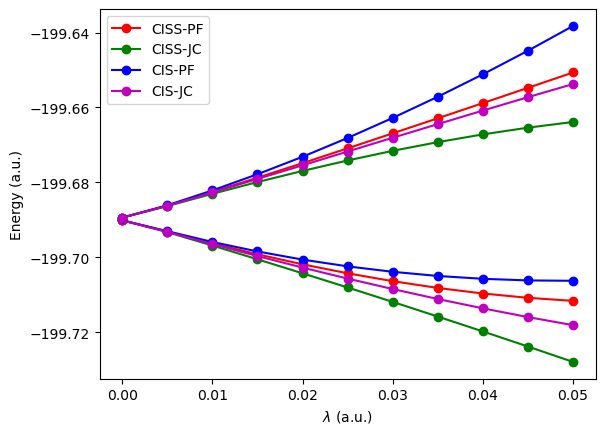

In [50]:
from matplotlib import pyplot as plt

plt.plot(lam_z, ciss_pf[1,:], 'r-o', label='CISS-PF')
plt.plot(lam_z, ciss_jc[1,:], 'g-o', label='CISS-JC')
plt.plot(lam_z, cis_pf[1,:], 'b-o', label='CIS-PF')
plt.plot(lam_z, cis_jc[1,:], 'm-o', label='CIS-JC')
plt.plot(lam_z, ciss_pf[2,:], 'r-o')
plt.plot(lam_z, ciss_jc[2,:], 'g-o')
plt.plot(lam_z, cis_pf[2,:], 'b-o')
plt.plot(lam_z, cis_jc[2,:], 'm-o')
#plt.plot(lam_z, ciss_pf[0,:], 'r--')
#plt.plot(lam_z, ciss_jc[0,:], 'g--')
#plt.plot(lam_z, cis_pf[0,:], 'b--')
#plt.plot(lam_z, cis_jc[0,:], 'm--')

plt.xlabel("$\lambda$ (a.u.)")
plt.ylabel("Energy (a.u.)")
plt.legend()
#plt.savefig("Compare_Prism.png")
plt.show()

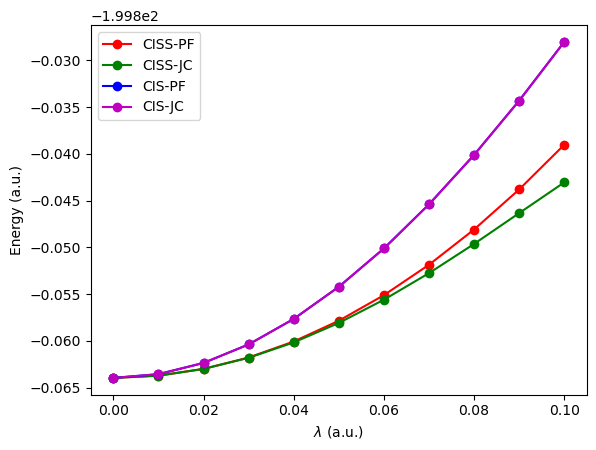

In [7]:
plt.plot(lam_z, ciss_pf[0,:], 'r-o', label='CISS-PF')
plt.plot(lam_z, ciss_jc[0,:], 'g-o', label='CISS-JC')
plt.plot(lam_z, cis_pf[0,:], 'b-o', label='CIS-PF')
plt.plot(lam_z, cis_jc[0,:], 'm-o', label='CIS-JC')

plt.xlabel("$\lambda$ (a.u.)")
plt.ylabel("Energy (a.u.)")
plt.legend()
#plt.savefig("Compare_Prism.png")
plt.show()

In [51]:
for i in range(len(lam_z)):
    print(lam_z[i], ciss_pf[0,i], ciss_pf[1,i], ciss_pf[2,i], 
          ciss_jc[0,i], ciss_jc[1,i], ciss_jc[2,i],
          cis_pf[0,i], cis_pf[1,i], cis_pf[2,i],
          cis_jc[0,i], cis_jc[1,i], cis_jc[2,i])

0.0 -199.86395910419134 -199.69011014186748 -199.6893973460788 -199.86395910419134 -199.69011014186748 -199.6893973460788 -199.86395910419134 -199.69011014186748 -199.6893973460788 -199.86395910419134 -199.69011014186748 -199.6893973460788
0.005 -199.86389891805138 -199.69311047856658 -199.6861939611766 -199.8638989419759 -199.69326382448713 -199.68631660718944 -199.86385853854935 -199.69301224891885 -199.68610578915676 -199.86385853854935 -199.69316178571734 -199.68623200627528
0.01 -199.86371825435393 -199.69624826906409 -199.68252059625368 -199.86371863688456 -199.69684229112707 -199.68303312341646 -199.8635572582209 -199.69589125223334 -199.68213287859592 -199.8635572582209 -199.69645365014892 -199.68267322882207
0.015 -199.86341669740466 -199.69917459517018 -199.67873484605852 -199.86341863108146 -199.7005116421302 -199.67989723759575 -199.8630564923226 -199.69842289787258 -199.6778138199193 -199.8630564923226 -199.69965047006835 -199.679066507739
0.02 -199.86299357873241 -199.701

In [42]:
r_array = np.linspace(1.3, 2.7, 29)
print(r_array)

[1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95
 2.   2.05 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65
 2.7 ]


In [43]:
# template for z-matrix
mol_tmpl = """
Mg
H 1 **R**
symmetry c1
1 1
"""

# set psi4 options
psi4.set_options(options_dict)
# array of bondlengths for MgH+
r_array = np.linspace(1.3, 2.7, 29)
#r_array = np.array([1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3, 2.4, 2.5, 2.6, 2.7]) #, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3])

# arrays for different models
ciss_pf_array = np.zeros((5,len(r_array)),dtype=complex)
ciss_jc_array = np.zeros((5,len(r_array)),dtype=complex)
cis_pf_array = np.zeros((5,len(r_array)),dtype=complex)
cis_jc_array = np.zeros((5,len(r_array)),dtype=complex)

# electric field strength 
lam_z = 0.01

# photon energy
om_r = 4.75 / 27.211

# approximate maximum value of transition dipole moment in a.u.
max_tdm = 2.25

# approximate max value of g
g_max = np.sqrt(om_r/2) * lam_z * max_tdm

print(" value of gamma to cross over from weak to strong coupling:", 4 * g_max)
#om = om_r #-> Figure 3a

om = om_r - 4 * (g_max/2) * 1j #-> Figure 3b

# lambda vector
lam = np.array([0,0,lam_z])

# loop over the different bond-lengths, create different instances
# of MgH+ molecule and compute and store various quantities
ctr = 0
for r in r_array:
    molstr = mol_tmpl.replace("**R**", str(r))
    mol = psi4.geometry(molstr)
    
    # run cqed_ciss prism with real omega
    cqed_cis_dict = cs_cqed_cis(lam, om_r, molstr, options_dict)
    
    cqed_scf_e = cqed_cis_dict["CQED-RHF ENERGY"]
    scf_e = cqed_cis_dict["RHF ENERGY"]
    
    # get eigenvalues from CISS-PF
    ciss_pf_e = cqed_cis_dict["CISS-PF ENERGY"]
    # get eigenvalues from CISS-JC
    ciss_jc_e = cqed_cis_dict["CISS-JC ENERGY"]
    # get eigenvalues from CIS-PF
    cis_pf_e = cqed_cis_dict["CIS-PF ENERGY"]
    # get eigenvalues from CIS-JC
    cis_jc_e = cqed_cis_dict["CIS-JC ENERGY"]

    
    ciss_pf_array[:5,ctr] = cqed_scf_e+ciss_pf_e[:5]
    ciss_jc_array[:5,ctr] = cqed_scf_e+ciss_jc_e[:5]
    
    cis_pf_array[0,ctr] = cqed_scf_e
    cis_jc_array[0,ctr] = cqed_scf_e

    cis_pf_array[1:5,ctr] = cqed_scf_e + cis_pf_e[0:4]
    cis_jc_array[1:5,ctr] = cqed_scf_e + cis_jc_e[0:4]
    ctr += 1
 

 value of gamma to cross over from weak to strong coupling: 0.026589003748838325

Start SCF iterations:

Canonical RHF One-electron energy = -285.7424508871265516
CQED-RHF One-electron energy      = -285.7418627122085013
Nuclear repulsion energy          = 4.8847127138769242
Dipole energy                     = 0.0003772529959485
SCF Iteration   1: Energy = -199.8572467889073891   dE = -1.99857E+02   dRMS = 9.08650E-06
SCF Iteration   2: Energy = -199.8572469005282812   dE = -1.11621E-07   dRMS = 3.29320E-06
SCF Iteration   3: Energy = -199.8572469138268843   dE = -1.32986E-08   dRMS = 1.23691E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.85724691 hartree
Psi4  SCF energy: -199.85744400 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -285.3993543336124503
CQED-RHF One-electron energy      = -285.3987430805198642
Nuclear repulsion energy          = 4.7037974281777784
Dipole energy                     = 0.0003926319626991
SCF Iteration   1: Energy = -199.8699877209676288   dE = -1.99870E+02   dRMS = 9.30010E-06
SCF Iteration   2: Energy = -199.8699878406042103   dE = -1.19637E-07   dRMS = 3.37341E-06
SCF Iteration   3: Energy = -199.8699878549503524   dE = -1.43461E-08   dRMS = 1.27264E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.86998785 hartree
Psi4  SCF energy: -199.87019013 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -285.0750814449448853
CQED-RHF One-electron energy      = -285.0744464388461097
Nuclear repulsion energy          = 4.5358046628857132
Dipole energy                     = 0.0004075885467619
SCF Iteration   1: Energy = -199.8797421528088023   dE = -1.99880E+02   dRMS = 9.54149E-06
SCF Iteration   2: Energy = -199.8797422816004428   dE = -1.28792E-07   dRMS = 3.46653E-06
SCF Iteration   3: Energy = -199.8797422971406377   dE = -1.55402E-08   dRMS = 1.31369E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.87974230 hartree
Psi4  SCF energy: -199.87995048 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -284.7689811297603342
CQED-RHF One-electron energy      = -284.7683216535133397
Nuclear repulsion energy          = 4.3793976055448276
Dipole energy                     = 0.0004221825449674
SCF Iteration   1: Energy = -199.8870023677418430   dE = -1.99887E+02   dRMS = 9.81045E-06
SCF Iteration   2: Energy = -199.8870025069118697   dE = -1.39170E-07   dRMS = 3.57250E-06
SCF Iteration   3: Energy = -199.8870025238015558   dE = -1.68897E-08   dRMS = 1.35991E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.88700252 hartree
Psi4  SCF energy: -199.88721734 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -284.4800254993833164
CQED-RHF One-electron energy      = -284.4793407985430349
Nuclear repulsion energy          = 4.2334176853600001
Dipole energy                     = 0.0004364688418178
SCF Iteration   1: Energy = -199.8921738692044698   dE = -1.99892E+02   dRMS = 1.01063E-05
SCF Iteration   2: Energy = -199.8921740200579222   dE = -1.50853E-07   dRMS = 3.69096E-06
SCF Iteration   3: Energy = -199.8921740384599275   dE = -1.84020E-08   dRMS = 1.41102E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.89217404 hartree
Psi4  SCF energy: -199.89239621 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -284.2070000184424430
CQED-RHF One-electron energy      = -284.2062893113985638
Nuclear repulsion energy          = 4.0968558245419358
Dipole energy                     = 0.0004504902836360
SCF Iteration   1: Energy = -199.8955911232295648   dE = -1.99896E+02   dRMS = 1.04280E-05
SCF Iteration   2: Energy = -199.8955912871480223   dE = -1.63918E-07   dRMS = 3.82124E-06
SCF Iteration   3: Energy = -199.8955913072331327   dE = -2.00851E-08   dRMS = 1.46657E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.89559131 hartree
Psi4  SCF energy: -199.89582155 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -283.9486473583834254
CQED-RHF One-electron energy      = -283.9479098482628956
Nuclear repulsion energy          = 3.9688290800249999
Dipole energy                     = 0.0004642742181236
SCF Iteration   1: Energy = -199.8975313929963420   dE = -1.99898E+02   dRMS = 1.07740E-05
SCF Iteration   2: Energy = -199.8975315714369003   dE = -1.78441E-07   dRMS = 3.96240E-06
SCF Iteration   3: Energy = -199.8975315933799379   dE = -2.19430E-08   dRMS = 1.52603E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.89753159 hartree
Psi4  SCF energy: -199.89777063 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -283.7037626236851793
CQED-RHF One-electron energy      = -283.7029975098668046
Nuclear repulsion energy          = 3.8485615321454540
Dipole energy                     = 0.0004778319657781
SCF Iteration   1: Energy = -199.8982261934263533   dE = -1.99898E+02   dRMS = 1.11428E-05
SCF Iteration   2: Energy = -199.8982263879113077   dE = -1.94485E-07   dRMS = 4.11333E-06
SCF Iteration   3: Energy = -199.8982264118910734   dE = -2.39798E-08   dRMS = 1.58876E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.89822641 hartree
Psi4  SCF energy: -199.89847496 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -283.4712468174024025
CQED-RHF One-electron energy      = -283.4704533054995181
Nuclear repulsion energy          = 3.7353685459058821
Dipole energy                     = 0.0004911602434854
SCF Iteration   1: Energy = -199.8978703921913507   dE = -1.99898E+02   dRMS = 1.15326E-05
SCF Iteration   2: Energy = -199.8978706043042450   dE = -2.12113E-07   dRMS = 4.27283E-06
SCF Iteration   3: Energy = -199.8978706305007336   dE = -2.61965E-08   dRMS = 1.65410E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.89787063 hartree
Psi4  SCF energy: -199.89812942 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -283.2501290604232622
CQED-RHF One-electron energy      = -283.2493063703335565
Nuclear repulsion energy          = 3.6286437303085721
Dipole energy                     = 0.0005042436565155
SCF Iteration   1: Energy = -199.8966292687463238   dE = -1.99897E+02   dRMS = 1.19416E-05
SCF Iteration   2: Energy = -199.8966295001210369   dE = -2.31375E-07   dRMS = 4.43969E-06
SCF Iteration   3: Energy = -199.8966295287135608   dE = -2.85925E-08   dRMS = 1.72137E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.89662953 hartree
Psi4  SCF energy: -199.89689929 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -283.0395680667011789
CQED-RHF One-electron energy      = -283.0387154387150304
Nuclear repulsion energy          = 3.5278480711333331
Dipole energy                     = 0.0005170575942439
SCF Iteration   1: Energy = -199.8946439410395612   dE = -1.99895E+02   dRMS = 1.23679E-05
SCF Iteration   2: Energy = -199.8946441933501603   dE = -2.52311E-07   dRMS = 4.61282E-06
SCF Iteration   3: Energy = -199.8946442245160995   dE = -3.11659E-08   dRMS = 1.78992E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.89464422 hartree
Psi4  SCF energy: -199.89492569 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -282.8388415663199567
CQED-RHF One-electron energy      = -282.8379582655388731
Nuclear repulsion energy          = 3.4325008259675673
Dipole energy                     = 0.0005295710872748
SCF Iteration   1: Energy = -199.8920355509391129   dE = -1.99892E+02   dRMS = 1.28099E-05
SCF Iteration   2: Energy = -199.8920358258867225   dE = -2.74948E-07   dRMS = 4.79120E-06
SCF Iteration   3: Energy = -199.8920358597987956   dE = -3.39121E-08   dRMS = 1.85915E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.89203586 hartree
Psi4  SCF energy: -199.89232977 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -282.6473300384986942
CQED-RHF One-electron energy      = -282.6464153578467062
Nuclear repulsion energy          = 3.3421718568631578
Dipole energy                     = 0.0005417493645983
SCF Iteration   1: Energy = -199.8889085293932339   dE = -1.99889E+02   dRMS = 1.32657E-05
SCF Iteration   2: Energy = -199.8889088286965148   dE = -2.99303E-07   dRMS = 4.97397E-06
SCF Iteration   3: Energy = -199.8889088655226089   dE = -3.68261E-08   dRMS = 1.92850E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.88890887 hartree
Psi4  SCF energy: -199.88921596 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -282.4644989546301304
CQED-RHF One-electron energy      = -282.4635522167747581
Nuclear repulsion energy          = 3.2564751425846152
Dipole energy                     = 0.0005535559826324
SCF Iteration   1: Energy = -199.8853531829878136   dE = -1.99885E+02   dRMS = 1.37337E-05
SCF Iteration   2: Energy = -199.8853535083608506   dE = -3.25373E-07   dRMS = 5.16039E-06
SCF Iteration   3: Energy = -199.8853535482620032   dE = -3.99012E-08   dRMS = 1.99745E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.88535355 hartree
Psi4  SCF energy: -199.88567457 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -282.2898820113255738
CQED-RHF One-electron energy      = -282.2889025697793954
Nuclear repulsion energy          = 3.1750632640200003
Dipole energy                     = 0.0005649544902489
SCF Iteration   1: Energy = -199.8814477754642382   dE = -1.99881E+02   dRMS = 1.42120E-05
SCF Iteration   2: Energy = -199.8814481286042337   dE = -3.53140E-07   dRMS = 5.34985E-06
SCF Iteration   3: Energy = -199.8814481717341778   dE = -4.31299E-08   dRMS = 2.06555E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.88144817 hartree
Psi4  SCF energy: -199.88178387 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -282.1230665980479557
CQED-RHF One-electron energy      = -282.1220538376824720
Nuclear repulsion energy          = 3.0976226966048781
Dipole energy                     = 0.0005759096537488
SCF Iteration   1: Energy = -199.8772602269631591   dE = -1.99877E+02   dRMS = 1.46989E-05
SCF Iteration   2: Energy = -199.8772606095284345   dE = -3.82565E-07   dRMS = 5.54185E-06
SCF Iteration   3: Energy = -199.8772606560323482   dE = -4.65039E-08   dRMS = 2.13239E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.87726066 hartree
Psi4  SCF energy: -199.87761178 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.9636819305044924
CQED-RHF One-electron energy      = -281.9626352676449983
Nuclear repulsion energy          = 3.0238697752571420
Dipole energy                     = 0.0005863883006885
SCF Iteration   1: Energy = -199.8728495187583007   dE = -1.99873E+02   dRMS = 1.51929E-05
SCF Iteration   2: Energy = -199.8728499323503627   dE = -4.13592E-07   dRMS = 5.73594E-06
SCF Iteration   3: Energy = -199.8728499823671996   dE = -5.00168E-08   dRMS = 2.19762E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.87284998 hartree
Psi4  SCF energy: -199.87321727 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.8113897937704451
CQED-RHF One-electron energy      = -281.8103086760099245
Nuclear repulsion energy          = 2.9535472223441857
Dipole energy                     = 0.0005963598577682
SCF Iteration   1: Energy = -199.8682668679480798   dE = -1.99868E+02   dRMS = 1.56922E-05
SCF Iteration   2: Energy = -199.8682673140875465   dE = -4.46139E-07   dRMS = 5.93179E-06
SCF Iteration   3: Energy = -199.8682673677474213   dE = -5.36599E-08   dRMS = 2.26091E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.86826737 hartree
Psi4  SCF energy: -199.86865157 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.6658775836986592
CQED-RHF One-electron energy      = -281.6647614895255742
Nuclear repulsion energy          = 2.8864211491090908
Dipole energy                     = 0.0006057966612405
SCF Iteration   1: Energy = -199.8635567206830501   dE = -1.99864E+02   dRMS = 1.61951E-05
SCF Iteration   2: Energy = -199.8635572007927692   dE = -4.80110E-07   dRMS = 6.12904E-06
SCF Iteration   3: Energy = -199.8635572582209079   dE = -5.74281E-08   dRMS = 2.32199E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.86355726 hartree
Psi4  SCF energy: -199.86395910 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.5268532325891897
CQED-RHF One-electron energy      = -281.5257016708900437
Nuclear repulsion energy          = 2.8222784569066670
Dipole energy                     = 0.0006146741133671
SCF Iteration   1: Energy = -199.8587576011585156   dE = -1.99859E+02   dRMS = 1.67000E-05
SCF Iteration   2: Energy = -199.8587581165340339   dE = -5.15376E-07   dRMS = 6.32738E-06
SCF Iteration   3: Energy = -199.8587581778497793   dE = -6.13157E-08   dRMS = 2.38060E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.85875818 hartree
Psi4  SCF energy: -199.85917840 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.3940415959070833
CQED-RHF One-electron energy      = -281.3928541053829804
Nuclear repulsion energy          = 2.7609245774086961
Dipole energy                     = 0.0006229707482255
SCF Iteration   1: Energy = -199.8539028446251393   dE = -1.99854E+02   dRMS = 1.72051E-05
SCF Iteration   2: Energy = -199.8539033964136422   dE = -5.51789E-07   dRMS = 6.52643E-06
SCF Iteration   3: Energy = -199.8539034617321022   dE = -6.53185E-08   dRMS = 2.43652E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.85390346 hartree
Psi4  SCF energy: -199.85434279 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.2671819262505437
CQED-RHF One-electron energy      = -281.2659580747716745
Nuclear repulsion energy          = 2.7021815012936172
Dipole energy                     = 0.0006306682510025
SCF Iteration   1: Energy = -199.8490212356724101   dE = -1.99849E+02   dRMS = 1.77086E-05
SCF Iteration   2: Energy = -199.8490218248363703   dE = -5.89164E-07   dRMS = 6.72567E-06
SCF Iteration   3: Energy = -199.8490218942649790   dE = -6.94286E-08   dRMS = 2.48955E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.84902189 hartree
Psi4  SCF energy: -199.84948104 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.1460261674804997
CQED-RHF One-electron energy      = -281.1447655513993027
Nuclear repulsion energy          = 2.6458860533499999
Dipole energy                     = 0.0006377514232722
SCF Iteration   1: Energy = -199.8441375672121580   dE = -1.99844E+02   dRMS = 1.82087E-05
SCF Iteration   2: Energy = -199.8441381945000614   dE = -6.27288E-07   dRMS = 6.92446E-06
SCF Iteration   3: Energy = -199.8441382681396306   dE = -7.36396E-08   dRMS = 2.53949E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.84413827 hartree
Psi4  SCF energy: -199.84461794 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -281.0303379775043595
CQED-RHF One-electron energy      = -281.0290402210043226
Nuclear repulsion energy          = 2.5918883787918365
Dipole energy                     = 0.0006442079694225
SCF Iteration   1: Energy = -199.8392731313120976   dE = -1.99839E+02   dRMS = 1.87040E-05
SCF Iteration   2: Energy = -199.8392737972767748   dE = -6.65965E-07   dRMS = 7.12227E-06
SCF Iteration   3: Energy = -199.8392738752245066   dE = -7.79477E-08   dRMS = 2.58627E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.83927388 hartree
Psi4  SCF energy: -199.83977477 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -280.9198923398474221
CQED-RHF One-electron energy      = -280.9185570944135293
Nuclear repulsion energy          = 2.5400506112159995
Dipole energy                     = 0.0006500280312491
SCF Iteration   1: Energy = -199.8344461499303293   dE = -1.99834E+02   dRMS = 1.91947E-05
SCF Iteration   2: Energy = -199.8344468550906186   dE = -7.05160E-07   dRMS = 7.31945E-06
SCF Iteration   3: Energy = -199.8344469374572725   dE = -8.23667E-08   dRMS = 2.63025E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.83444694 hartree
Psi4  SCF energy: -199.83496974 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -280.8144746759940631
CQED-RHF One-electron energy      = -280.8131016196733185
Nuclear repulsion energy          = 2.4902456972705886
Dipole energy                     = 0.0006552042946595
SCF Iteration   1: Energy = -199.8296721520105734   dE = -1.99830E+02   dRMS = 1.96823E-05
SCF Iteration   2: Energy = -199.8296728970345271   dE = -7.45024E-07   dRMS = 7.51740E-06
SCF Iteration   3: Energy = -199.8296729839727277   dE = -8.69382E-08   dRMS = 2.67221E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.82967298 hartree
Psi4  SCF energy: -199.83021837 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -280.7138788063428478
CQED-RHF One-electron energy      = -280.7124676422150173
Nuclear repulsion energy          = 2.4423563569384621
Dipole energy                     = 0.0006597333225310
SCF Iteration   1: Energy = -199.8249643024544184   dE = -1.99825E+02   dRMS = 2.01671E-05
SCF Iteration   2: Energy = -199.8249650880433990   dE = -7.85589E-07   dRMS = 7.71675E-06
SCF Iteration   3: Energy = -199.8249651797338515   dE = -9.16905E-08   dRMS = 2.71279E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.82496518 hartree
Psi4  SCF energy: -199.82553380 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -280.6179061493743916
CQED-RHF One-electron energy      = -280.6164566036863448
Nuclear repulsion energy          = 2.3962741615245275
Dipole energy                     = 0.0006636159640651
SCF Iteration   1: Energy = -199.8203336873017975   dE = -1.99820E+02   dRMS = 2.06474E-05
SCF Iteration   2: Energy = -199.8203345139400540   dE = -8.26638E-07   dRMS = 7.91648E-06
SCF Iteration   3: Energy = -199.8203346105591436   dE = -9.66191E-08   dRMS = 2.75223E-06
Total time for SCF iterations: 0.004 seconds 

QED-RHF   energy: -199.82033461 hartree
Psi4  SCF energy: -199.82092711 hartree


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


102

Start SCF iterations:

Canonical RHF One-electron energy = -280.5263662025528788
CQED-RHF One-electron energy      = -280.5248780230256784
Nuclear repulsion energy          = 2.3518987140888892
Dipole energy                     = 0.0006668565175650
SCF Iteration   1: Energy = -199.8157895598197342   dE = -1.99816E+02   dRMS = 2.11216E-05
SCF Iteration   2: Energy = -199.8157904277504997   dE = -8.67931E-07   dRMS = 8.11523E-06
SCF Iteration   3: Energy = -199.8157905294577006   dE = -1.01707E-07   dRMS = 2.79077E-06
SCF Iteration   4: Energy = -199.8157905429549999   dE = -1.34973E-08   dRMS = 1.06463E-06
Total time for SCF iterations: 0.005 seconds 

QED-RHF   energy: -199.81579054 hartree
Psi4  SCF energy: -199.81640753 hartree
102


/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S0_offset:R1_offset, S0_offset:R1_offset] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_DSE[S1_offset:, S1_offset:] = D_matrix
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:285: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S1_offset:,S0_offset:R1_offset] = G
/Users/jfoley19/Code/psi4polaritonic/helper_ciss_prism.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  H_CISS_BLC[S0_offset:R1_offset, S1_offset:] = G


/opt/homebrew/Caskroom/miniforge/base/envs/psi4/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


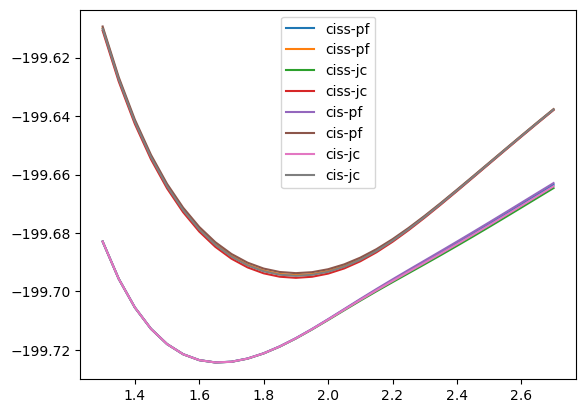

In [44]:
plt.plot(r_array, ciss_pf_array[1,:], label='ciss-pf')
plt.plot(r_array, ciss_pf_array[2,:], label='ciss-pf')
plt.plot(r_array, ciss_jc_array[1,:], label='ciss-jc')
plt.plot(r_array, ciss_jc_array[2,:], label='ciss-jc')
plt.plot(r_array, cis_pf_array[1,:], label='cis-pf')
plt.plot(r_array, cis_pf_array[2,:], label='cis-pf')
plt.plot(r_array, cis_jc_array[1,:], label='cis-jc')
plt.plot(r_array, cis_jc_array[2,:], label='cis-jc')
plt.legend()


In [37]:
for i in range(len(r_array)):
    print(r_array[i], np.real(ciss_pf_array[0,i]), np.real(ciss_pf_array[1,i]), np.real(ciss_pf_array[2,i]), 
          np.real(ciss_jc_array[0,i]), np.real(ciss_jc_array[1,i]), np.real(ciss_jc_array[2,i]),
          np.real(cis_pf_array[0,i]), np.real(cis_pf_array[1,i]), np.real(cis_pf_array[2,i]),
          np.real(cis_jc_array[0,i]), np.real(cis_jc_array[1,i]), np.real(cis_jc_array[2,i]))

1.3 -199.85729904404351 -199.68294339509256 -199.6099643564819 -199.8572991099444 -199.68294580550938 -199.6107630211893 -199.85724691382688 -199.68294214134278 -199.60934709706157 -199.85724691382688 -199.68294451694697 -199.61014381853155
1.35 -199.8700426723887 -199.69571214861304 -199.6273544697016 -199.87004274384014 -199.69571507720056 -199.6281691714749 -199.86998785495035 -199.69571059900946 -199.62672498822565 -199.86998785495035 -199.6957134810636 -199.62753767483858
1.4000000000000001 -199.87980016530048 -199.7055005636994 -199.64186144218183 -199.87980024320802 -199.70550418347457 -199.64269200181195 -199.87974229714064 -199.7054986163646 -199.64122060616205 -199.87974229714064 -199.70550217257153 -199.64204908257327
1.4500000000000002 -199.88706380922758 -199.71280220982393 -199.65391734598725 -199.88706389457366 -199.71280675855246 -199.65476350892726 -199.88700252380156 -199.712799723576 -199.65326602809526 -199.88700252380156 -199.7128041836209 -199.6541100459055
1.5 -1